# 1. Introduction

In this notebook we are going to deal with a unsupervised learning (learning without teacher) problem called Agglomerative clustering.

## 1.1. Clustering

The Target of clustering is to find a function which can divide the dataset into the groups known as clusters. This function divide the dataset in way that similar data instances are assigned to the same cluster, as a result dissimilar objects are assigned to different clusters. **Hierarchical Clustering** is a type of clustering which is further divided into two types of clustering :
    1. Agglomerative clustering - Bottom up approach.
    2. Divisive clustering - Top down approach.
    
**Agglomerative clustering** is targeted in this notebook.

### 1.1.1 Agglomerative clustering
It is a method of clustering which follows an iterative bottom up approach. The procedure of this algorithms follows 3 steps mainly. 

    1. First, each data point is put into its own cluster of one item.
    2. Then, a sequence of clusterings are done where the most similar two clusters at each stage are merged into a new cluster.
    3. Then, this process is repeated until some stopping condition is met. In scikit-learn, the stopping condition is the number of clusters.

Three different linkage criteria(can be used to minimize varients) can be in Agglomerative clustering.
    1. Ward's method- Least increase in total variance (around the cluster centroids).
    2. Average linkage - Average distance between clusters.
    3. Complete linkage - Max distance between clsuters.

# 2. Steps Involved:
    0. Importing the required libraries - For importing all the dependencies.
    1. Making the Fucntions of the required steps.
    2. Importing dataset - For importing Dataset in the programm.
    3. Feature Engineering - For getting features from the dataset.
    4. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset 
    5. Model Building - For Building the model (using sklearn).
    6. Model Fitting - Fitting the model for clustering.
    7. Saving the model - For re-use.
    8. Loading the model - for loading the trained model
    9. Evaluation of the model - For cheking the utility of the model.   

# 3. Prerequisties 

## 3.1 Dataset 
Mall_Customers.csv has been used as dataset which is consist of 5 columns:
    1. CustomerID
    2. Genre 
    3. Age
    4. Annual Income
    5. Spending Score
## 3.2 Libraries Requirements 
    scikit-learn == 0.19.1
    scipy == 1.1.0
    pandas == 0.23.1
    matplotlib == 2.0.2
    numpy == 1.16.3
    pickle == 0.7.4
    
# 4. Use Case
Some famous use cases of Agglomerative clustering are :
    1. Charting Evolution through Phylogenetic Trees
    2. Tracking Viruses through Phylogenetic Trees

## Step 0. Importing the required libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pickle

## Step 1. Making the Fucntions of the required steps

In [51]:
# FUNCTION FOR IMPORTING THE DATASET
# Input:path of the dataset (CSV)
# Output:dataframe 
                                   
def import_dataset(path):
  rd=pd.read_csv(path)
  return rd

In [52]:
# FUNCTION FOR SPLITING THE DATASET INTO TRAIN DATASET
# Input:dataframe
# Output:train dataset

def split_dataset(rd):
    X=rd.iloc[:,[3,4]].values
    return X

In [53]:
# FUNCTION OF INSTIALISING DENDOGRAM
# Input:training Dataset
# Output:dendogram which can be used for visualizarion

def dendrogram_instialise(X):
    dendrogram= sch.dendrogram(sch.linkage(X, method='ward'))
    return dendrogram

In [54]:
# FUNCTION OF BUILDING THE MODEL
# Input:null
# Output:empty_instialised_model

def model_build():
    hc=AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')
    return hc

In [55]:
# FUNCTION FOR FITTING THE MODEL
# Input:empty_instialised_model and training set
# Trained model:trained_model

def model_fit(hc,X):
    model=hc.fit_predict(X)
    return model

In [56]:
# FUNCTION FOR SAVING THE MODEL 
# Input:trained_model
# Output:Null(model will be saved in the directory)


def model_save(model):
    pickle.dump(model, open('models/agglomerative.pickle', 'wb'))

In [57]:
# FUNCTION FOR LOADING THE MODEL
# Input:path_for saving the model
# Output:loaded model

def model_load(path_model):
    model_loaded=pickle.load(open(path_model, 'rb'))
    return model_loaded

## Step 2. Importing dataset

In [58]:
# Importing CSV
path = 'data/Mall_Customers.csv'
df = import_dataset(path)

## Step 3. Feature Engineering 

In [59]:
# Feature Extraction
# Taking column 3 & 4 as main features for clustering 
X = split_dataset(df)

## Step 4. Exploratory Data Analysis 

In [60]:
# Checking the structure of the Data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
# Checking the shape of the data
# First entry represent number of rows and second represents number of columns
df.shape

(200, 5)

In [62]:
# Checking the dataset
df.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


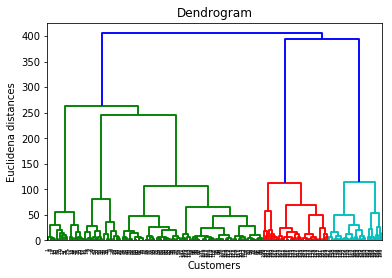

In [63]:
# Checking the structure of the existing clusters in the dataset using dendograms.
# x-axis:customers
# y-axis:euclidean distances

dendrogram = dendrogram_instialise(X)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidena distances')
plt.show()

## Step 5. Building the model

In [64]:
# Building the basic model

hc = model_build()

## Step 6. Model Fitting

In [65]:
# Fitting the model on training dataset 
model = model_fit(hc,X)

## Step 7. Saving the model

In [66]:
# saving the model in the directory
filename = model_save(model)

## Step 8. Loading the model

In [67]:
# Loading the model from the directory 
path_model = 'models/agglomerative.pickle'
y_hc = model_load(path_model)

## Step 9.  Evaluation of the model

In [68]:
#visualising the cluster as results to evaluate the model
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careful')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Sensible')

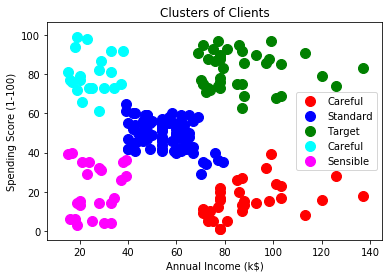

In [69]:
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()